In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.sales_channel.unique()

array(['Internet', 'Mobile'], dtype=object)

In [6]:
df.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [7]:
df.booking_complete.unique()


array([0, 1], dtype=int64)

In [8]:
from scipy.stats import chi2_contingency
categorical_columns = df.select_dtypes(include=['object'])

# Create an empty DataFrame for the correlation table
correlation_table = pd.DataFrame(index=categorical_columns.columns, columns=categorical_columns.columns)

# Perform the chi-square test for each pair of categorical columns
for col1 in categorical_columns.columns:
    for col2 in categorical_columns.columns:
        contingency_table = pd.crosstab(categorical_columns[col1], categorical_columns[col2])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        correlation_table.loc[col1, col2] = p

# Convert p-values to numeric data type
correlation_table = correlation_table.astype(float)

<Axes: >

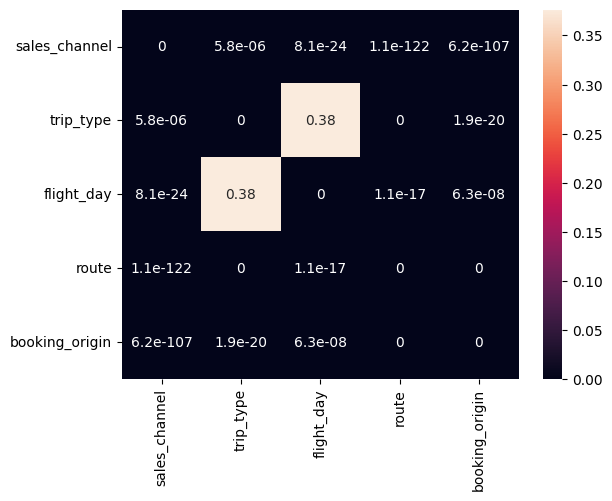

In [9]:

sns.heatmap(data=correlation_table,annot = True)


- when ploted heatmap on categorical column only one column had positive correlation.

<Axes: >

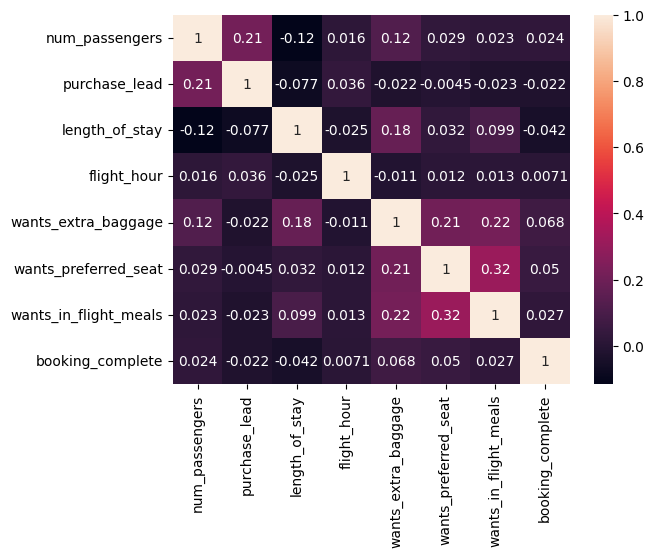

In [10]:
num_columns = df.select_dtypes(include=['int64'])

sns.heatmap(data=num_columns.corr(),annot=True)

- when plotted heatmap of numerical columns there was no significant realtion between columns

### To find correaltion between predict columns ( booking complete ) and other columns

- Null hypothesis = No relationship
- Alternative = there is realtionship

#### Testing Numerical column

In [11]:

nc = df[['booking_complete','wants_in_flight_meals']]

In [12]:
import scipy.stats as stats

# Separate data into two groups based on the 'Category' column
group_A = nc[nc['booking_complete'] == 1 ]['wants_in_flight_meals']
group_B = nc[nc['booking_complete'] == 0 ]['wants_in_flight_meals']

# Perform a t-test
t_statistic, p_value = stats.ttest_ind(group_A, group_B)

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Determine significance
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print('There is a Significant relationship')
else:
    print('There is No Significant relationship')

T-statistic: 5.929963145061911
P-value: 3.0498700651549964e-09
There is a Significant relationship


- num_passengers
T-statistic: 5.394012535709321
P-value: 6.921342270217208e-08
There is a Significant relationship

- purchase lead
T-statistic: -4.94969640111078
P-value: 7.457066331761684e-07
There is a Significant relationship

- length of stay
T-statistic: -9.49106175322029
P-value: 2.3836439466535115e-21
There is a Significant relationship

- wants extra baggage
T-statistic: 15.27142206533116
P-value: 1.558433037065175e-52
There is a Significant relationship

- wants preffered seat
T-statistic: 11.220144017528835
P-value: 3.519168931101158e-29
There is a Significant relationship

- wants meals
T-statistic: 5.929963145061911
P-value: 3.0498700651549964e-09
There is a Significant relationship

In [13]:
num_columns.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'booking_complete'],
      dtype='object')

In [14]:
num = pd.DataFrame({'Numerical':['num_passengers','purchase_lead','length_of_stay',
                                       'wants_extra_baggage','wants_preferred_seat',
                                       'wants_in_flight_meals'],
                        'P value':[]
                        })

ValueError: All arrays must be of the same length

In [ ]:
df.num_passengers.describe()

count    50000.000000
mean         1.591240
std          1.020165
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: num_passengers, dtype: float64

In [ ]:
numerical_col = df['num_passengers']
categorical_col = df['booking_complete']

In [ ]:
import scipy.stats as stats

# Assuming you have a numerical column 'numerical_col' and a categorical column 'categorical_col' in a DataFrame 'df'

# Group the numerical data by the categories in the categorical column
groups = []
for category in df['booking_complete'].unique():
    groups.append(df['num_passengers'][df['booking_complete'] == category])

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*groups)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)




F-statistic: 29.095371235389326
P-value: 6.921342270272393e-08
